In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/yeftayudistira/data/refs/heads/main/diabetes_new.csv")
data.head()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1


In [3]:
data.duplicated().sum()

386

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data['Type'].unique()

array(['Type1', 'Normal', 'Type2'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 0 to 823
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       623 non-null    int64  
 1   BS Fast   623 non-null    float64
 2   BS pp     623 non-null    float64
 3   Plasma R  623 non-null    float64
 4   Plasma F  623 non-null    float64
 5   HbA1c     623 non-null    int64  
 6   Type      623 non-null    object 
 7   Class     623 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 43.8+ KB


In [7]:
data.describe()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Class
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,33.897271,14.416212,6.684109,10.586517,5.947994,42.078652,0.313002
std,12.102418,13.317531,1.137120,1.417510,1.565779,11.661431,0.464088
min,21.000000,0.000000,4.200000,7.900000,3.900000,28.000000,0.000000
25%,24.000000,5.600000,5.800000,10.200000,4.800000,33.000000,0.000000
50%,30.000000,6.800000,6.800000,10.900000,5.600000,40.000000,0.000000
75%,41.000000,25.000000,7.700000,11.400000,7.400000,53.000000,1.000000
max,81.000000,54.000000,8.800000,13.100000,9.100000,69.000000,1.000000


In [8]:
X = data[['Age','BS Fast','BS pp','Plasma R','Plasma F','HbA1c']]
y = data['Class']

In [9]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size= 0.20, random_state=42)

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 100.00%


In [11]:
df = data[['Age','BS Fast','BS pp','Plasma R','Plasma F','HbA1c','Class']]
df.corr()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Class
Age,1.000000,-0.222873,-0.008145,0.116323,0.178359,0.197588,0.216410
BS Fast,-0.222873,1.000000,0.025139,-0.254357,-0.342720,-0.362790,-0.411225
BS pp,-0.008145,0.025139,1.000000,-0.015503,0.081335,0.298749,0.054224
Plasma R,0.116323,-0.254357,-0.015503,1.000000,0.736790,0.403020,0.666523
Plasma F,0.178359,-0.342720,0.081335,0.736790,1.000000,0.762364,0.878003
HbA1c,0.197588,-0.362790,0.298749,0.403020,0.762364,1.000000,0.898535
Class,0.216410,-0.411225,0.054224,0.666523,0.878003,0.898535,1.000000


<Axes: >

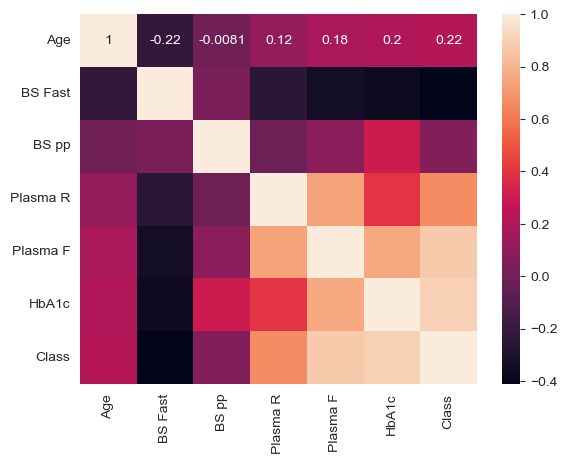

In [12]:
sns.heatmap(df.corr(), annot = True)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[87  0]
 [ 0 38]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [14]:
import pickle

In [15]:
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)